In [1]:
#Se carga Módulo de Vector Field Plot
import vectorfieldplot.vfp as vfp
#Se carga función para visualizar el archivo en formato svg
from IPython.display import SVG
#Se cargan funciones para la interactividad
from ipywidgets import interactive
from IPython.display import display

# Dipolo Eléctrico

El campo eléctrico que las cargas puntuales $q_{1}$ y $q_{2}$ ubicadas en la posiciones $\vec{r}_{1}$ y $\vec{r}_{2}$ respectivamente, generan en la posición $\vec{r}$ está dado por:

$$\vec{E}(\vec{r}) = \frac{k_{e} q_{1}}{||\vec{r}-\vec{r}_{1}||^3} (\vec{r}-\vec{r}_{1})+\frac{k_{e} q_{2}}{||\vec{r}-\vec{r}_{2}||^3} (\vec{r}-\vec{r}_{2}),$$

donde $k_{e}$ es la constante eléctrica cuyo valor en el SI es $k_{e} \approx 8.99\times 10^{9}~\text{Nm}^2\text{C}^{-2}.$

## ¿Cómo elaborar una imagen?

### 1. Se crea el archivo y se configura el campo

In [2]:
#Si quiere rehacer la imagen debe volver a ejecutar desde esta celda en adelante
doc = 1
del doc
#Se crea documento donde se dibujará las líneas de campo eléctrico
name = 'dipolo_electrico'
doc = vfp.FieldplotDocument(name, commons=True,center=[300,300],width=600,height=600)
#Se configura el campo eléctrico
field = vfp.Field([['monopole', {'x':-1, 'y':0, 'Q':1}], ['monopole', {'x':1, 'y':0, 'Q':-1}]])
#Se dibujan las cargas que generan el campo
doc.draw_charges(field) 

### 2. Se itera para dibujar cada una de las líneas de campo

In [3]:
#Se configura el número de líneas de campo Eléctrico
n = 4
#Se itera para dibujar las líneas de campo eléctrico
for i in range(n):
    t = -1.0 + 2.0 * (i + 0.5) / n
    y = 0.25 * ((t-1)**-2 - (t+1)**-2) - 0.3*t
    line = vfp.FieldLine(field, [0, y], directions='both', maxr=1e4, maxn=2e4)
    doc.draw_line(line, linewidth=1.0, arrows_style={'dist':1.25, 'scale':1.1, 'max_arrows':4})

### 3. Se exporta en el archivo en formato svg

In [4]:
#Se guarda archivo en formato svg
doc.write()

('image written to', 'dipolo_electrico.svg')


In [5]:
# Verifique que se ha exportado el archivo name+'.svg'
%ls

animacion_dipolo_electrico_ideal.svg  dipolo-ideal.ipynb
animacion_dipolo_electrico.svg        dipolo.ipynb
animacion_monopolo_electrico.svg      monopolo_electrico.svg
dipolo_electrico_ideal.svg            monopolo.ipynb
dipolo_electrico.svg


### 4. Se carga y visualiza el archivo en formato svg

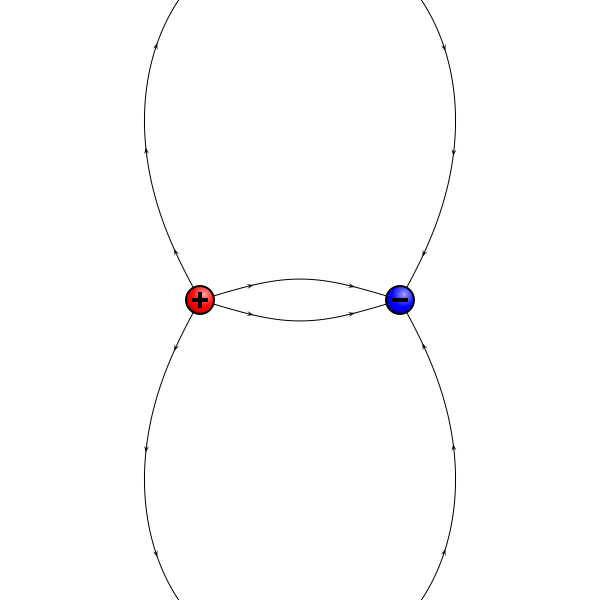

In [6]:
#Se visualiza el archivo
display(SVG(filename='dipolo_electrico.svg'))

# Animación

In [7]:
name = 'animacion_dipolo_electrico'
def no_interactive(d=1, Q1=1,Q2=-1, n=0):
    doc = 1
    del doc
    #Se genera el arhivo en el que se trabajará
    doc = vfp.FieldplotDocument(name, commons=True,center=[300,300],width=700,height=600,unit=100)
    #Se configura el campo eléctrico
    field = vfp.Field([['monopole', {'x':-d/2, 'y':0, 'Q':Q1}], ['monopole', {'x':d/2, 'y':0, 'Q':Q2}]])
    #Se dibujan las cargas que generan el campo eléctrico
    doc.draw_charges(field) 
    #Se itera para dibujar cada una de las líneas de campo
    for i in range(n):
        t = -1.0 + 2.0 * (i + 0.5) / n
        y = 0.25 * ((t-1)**-2 - (t+1)**-2) - 0.3*t
        line = vfp.FieldLine(field, [0, y], directions='both', maxr=1e4, maxn=2e4)
        doc.draw_line(line, linewidth=1.0, arrows_style={'dist':1.25, 'scale':1.1, 'max_arrows':2})
    #Se guarda el archivo en formato svg
    doc.write()
    #Se visualiza el archivo
    display(SVG(filename=name+'.svg'))

('image written to', 'animacion_dipolo_electrico.svg')


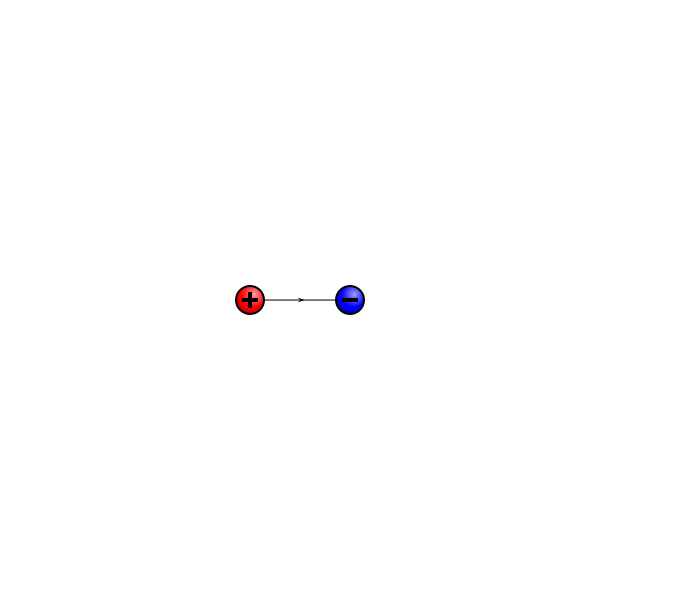

In [8]:
display(interactive(no_interactive,
                    d = (0,5,0.1), Q1 = (-10,10,0.5), Q2 = (-10,10,0.5), n = (1,40,1)))